# ADS2288 - October 16th
> Additional plotting concepts

---

Last class, we saw how to construct fairly simple plots - including line plots, scatter plots, and histograms.  We even saw how we could integrate `numpy` into our plots using the function `linspace`.  Now, let's see how we can do more with our plots - including integrating `pandas`, and playing with the plot itself to make it a little more visually appealing.

First, let's load all the libraries we will need today. **Recall** it is best practice to start your program with importing any and all libraries that you need in your program.  Here, we need all three libraries we've introduced.

In [1]:
# Import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using Data in a DataFrame to Create a Plot
> pandas and plotting combined
---

After we have read a spreadsheet file into Python using `pandas`, we may wish to visualize certain portions of the data set to get a sense of their correlation.  In lab, you were introduced to the *correlation matrix* that `pandas` encodes, but sometimes we would rather visualize the scatter plot. 

Let's load in our data set called `cost_of_living_us.csv` into Python, and do some basic data exploration using `head()` and `describe()`.

In [3]:
# Load in the data set
cost_df = pd.read_csv("cost_of_living_us.csv")
cost_df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


Using some DataFrame indexing, we are able to "pull" columns out and store them as their own variables.  This will allow us to access them easier for plotting. 

*Note - we could just index in our plotting function.  However, it could get really messy and hard to read. It is a better tactic to "pull" columns out individually and plot.*

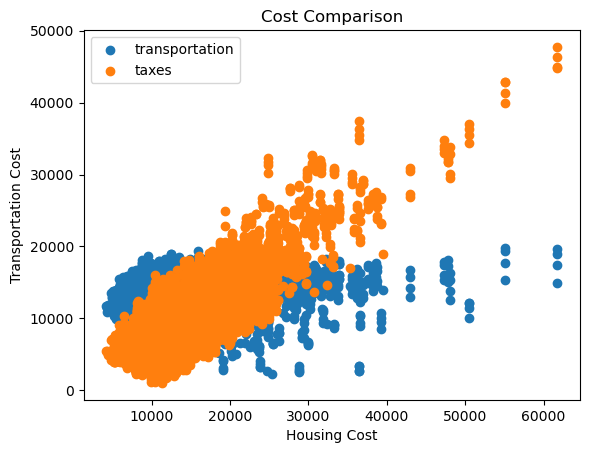

In [5]:
# "Pull" two columns out of the cost_df DataFrame to plot

x = cost_df['housing_cost']
y = cost_df['transportation_cost']
y2 = cost_df['taxes']

plt.scatter(x, y, label = 'transportation')
plt.scatter(x, y2, label = 'taxes')

plt.xlabel('Housing Cost')
plt.ylabel('Transportation Cost')
plt.title('Cost Comparison')
plt.legend() #easier to label as we go in the scatter fn instead of doing all in the legend 

plt.show()

### Plotting a line of best fit

In Python, we can plot a line of best fit in a few different ways.  The way that we will demonstrate in ADS2288 is using a `numpy` function called `polyfit`.  However, there are libraries built for Python that will complete a proper linear regression calculation on two data sets - this is beyond the scope of this course.  *If interested, please speak to Tyler outside of class*.

The `polyfit` function takes three arguements - called as `polyfit(x,y,n)` - and returns two arguements (when asking it to construct a line).  In our function call, `x` and `y` are the data sets that we wish to create a line of best fit for, and `n` is the degree of the polynomial we are fitting.  For our course, we will **always** set `n` to $1$.

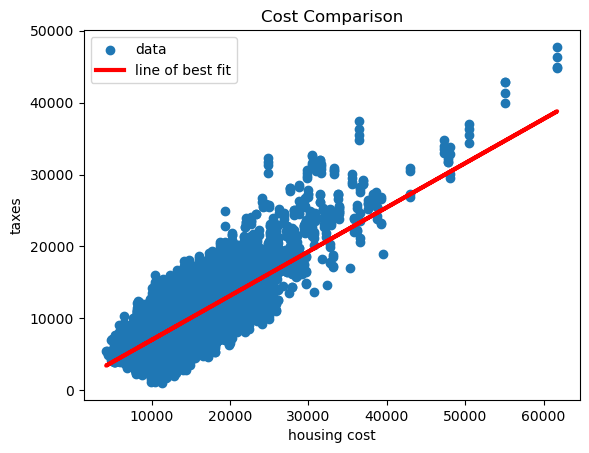

In [16]:
# Create a line of best fit for the housing cost vs. taxes and plot
m, b = np.polyfit(x, y2, 1)
#print(m) #slope
#print(b) #y-int

plt.scatter(x, y2, label = 'data')
plt.plot(x, m*x + b, 'r-', linewidth = 3, label = 'line of best fit')

plt.xlabel('housing cost')
plt.ylabel('taxes')
plt.title("Cost Comparison")
plt.legend()

plt.show()

---
### Exercise
Create a plot that has two columns from our DataFrame plotted as the data, and its line of best fit.  Colour the data blue, and the line of best fit red with some additional width.

---

## Advanced Customization of Your Plots
> Making bigger figures, setting axis boundaries, customizing legend location, more


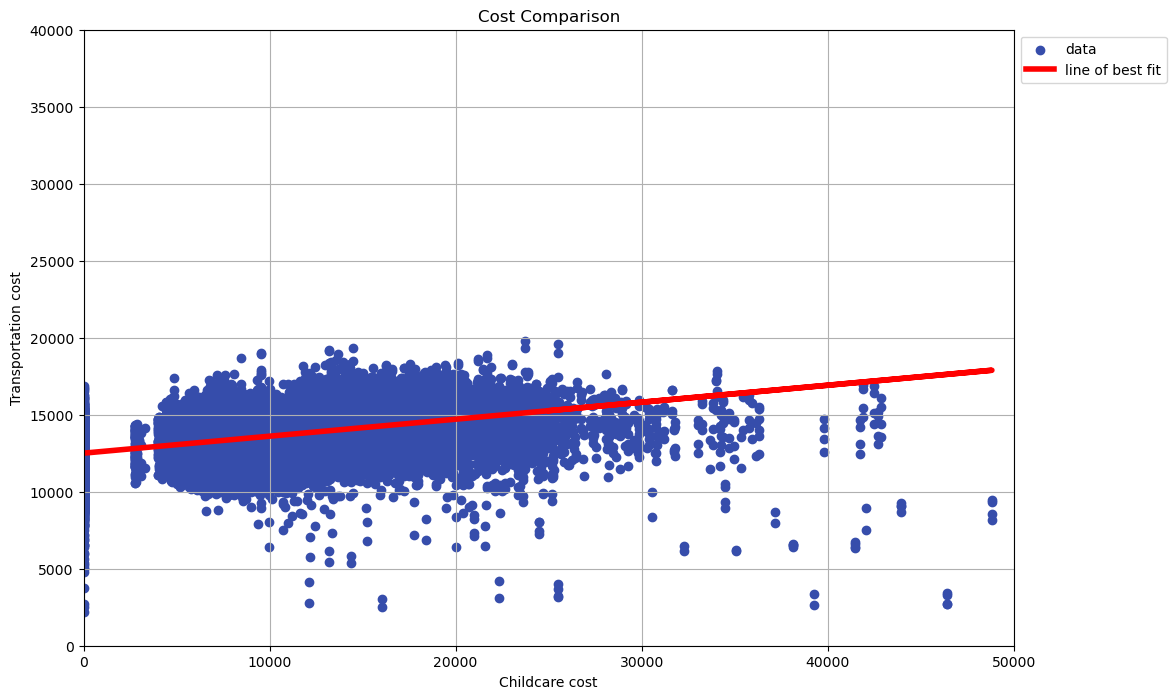

In [48]:
x = cost_df["childcare_cost"]
y = cost_df['transportation_cost']
m, b = np.polyfit(x, y, 1)

# Make a "bigger" figure
plt.figure(figsize = (12,8))

# Creating your own colours!
custom_colour = (0.21, 0.3, 0.67) #RGB values on a [0,1] interval

plt.scatter(x, y, label = 'data', color = custom_colour)
plt.plot(x, m*x + b, 'r-', linewidth = 4, label = 'line of best fit')

# Set Axis Limits
plt.xlim(0,50000)
plt.ylim(0,40000)

plt.xlabel('Childcare cost')
plt.ylabel('Transportation cost')
plt.title("Cost Comparison")

# Plotting the legend outside of the figure
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))

# Adding gridlines to the plot
plt.grid()

plt.show()

## Seaborn - NOT TESTABLE
> A Better Plotting Library
---

The Seaborn library provides a high-level interface for creating informative and attractive statistical graphics. The documentation for `seaborn` can be found here - https://seaborn.pydata.org/.

This is not testable material. However, for interest, we can see a newer library that does plotting in a similar way to `matplotlib`.  Seaborn was developed, in essence, to replace `matplotlib`, but has more difficult syntax in general.  Its basis is still `matplotlib` and is a modified version of this library.  It specifically was designed to build and create statistical plots *easily*. 

In [ ]:
# seaborn example
